In [1]:
!python ../src/utils.py
%reload_ext autoreload

In [2]:
import os
import math
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
import copy
import utils 
from ROOT import VecOps
from analysis import (df1, tree1, HMNCSBR, TRUNCSBR, COLOR_MAP)

name_tag = str(utils.TAG)
print("cwd:", os.getcwd())

cwd: /home/bothsides/projects/optimizing_DEDx_estimator/notebooks


In [3]:
for branch in tree1.GetListOfBranches():
    for leaf in branch.GetListOfLeaves():
        print(f"Branch `{branch.GetName()}` → Leaf `{leaf.GetName()}` : {leaf.GetTypeName()}")

Branch `DeDx_FiPixel` → Leaf `DeDx_FiPixel` : vector<float>
Branch `DeDx_FiPixelNoL1` → Leaf `DeDx_FiPixelNoL1` : vector<float>
Branch `DeDx_Gi` → Leaf `DeDx_Gi` : vector<float>
Branch `DeDx_GiStrip` → Leaf `DeDx_GiStrip` : vector<float>
Branch `DeDx_Ih` → Leaf `DeDx_Ih` : vector<float>
Branch `DeDx_IhNOM` → Leaf `DeDx_IhNOM` : vector<unsigned int>
Branch `DeDx_IhNoL1` → Leaf `DeDx_IhNoL1` : vector<float>
Branch `DeDx_IhNoL1NOM` → Leaf `DeDx_IhNoL1NOM` : vector<unsigned int>
Branch `DeDx_IhPixel` → Leaf `DeDx_IhPixel` : vector<float>
Branch `DeDx_IhPixelNoL1` → Leaf `DeDx_IhPixelNoL1` : vector<float>
Branch `DeDx_IhStrip` → Leaf `DeDx_IhStrip` : vector<float>
Branch `DeDx_IhStrip1` → Leaf `DeDx_IhStrip1` : vector<float>
Branch `DeDx_IhStrip3` → Leaf `DeDx_IhStrip3` : vector<float>
Branch `DeDx_IhStrip4` → Leaf `DeDx_IhStrip4` : vector<float>
Branch `DeDx_It` → Leaf `DeDx_It` : vector<float>
Branch `DeDx_ItStrip` → Leaf `DeDx_ItStrip` : vector<float>
Branch `DeDx_ItStrip0` → Leaf `DeDx_

In [11]:
df = df1.Filter(
    "ROOT::VecOps::Sum( "
    "  (IsoTrack_pt > 0.40) && "
    "  IsoTrack_isHighPurityTrack "
    ") > 0"
)


In [6]:
p_branch      = "IsoTrack_pt"
est_branch   = "DeDx_IhStrip"


# Momentum bin edges for MPV extraction (coarser = more stable fits):
p_edges = [0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0,4.0,5.0]

# Reference species mass for the fit (π by default) and masses for extrapolation:
m_pi = 0.13957
masses = {"#pi":0.13957, "K":0.49367, "p":0.93827, "D":1.87561}  # GeV

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


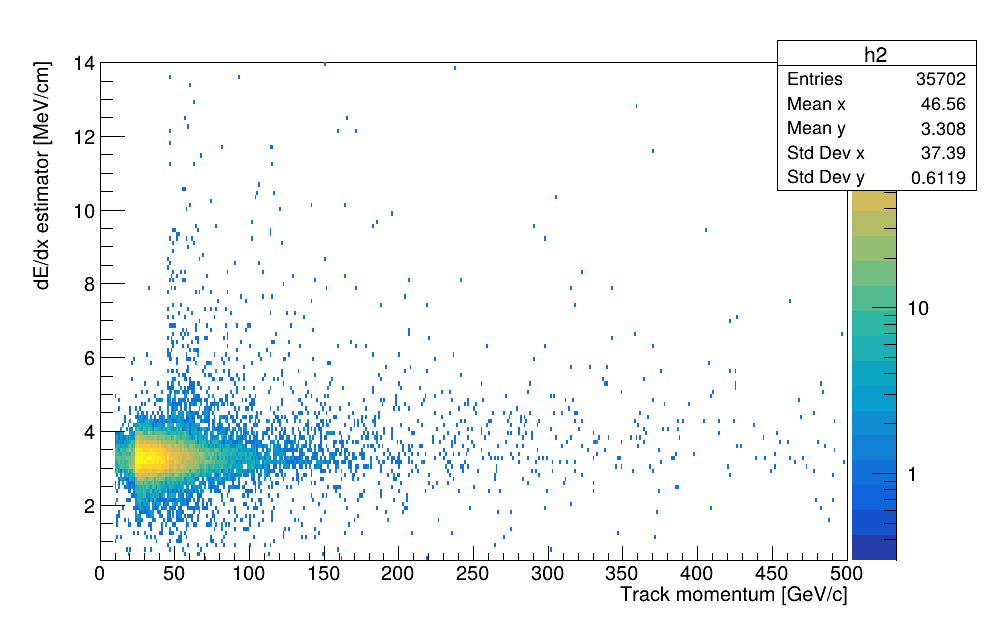

In [12]:
# ---------- 2D histogram ----------
xbins, xmin, xmax = 400, 0, 500
ybins, ymin, ymax = 120, 0.5, 14.0
h2d = df.Histo2D(("h2",";Track momentum [GeV/c];dE/dx estimator [MeV/cm]", 
                  xbins, xmin, xmax, ybins, ymin, ymax), p_branch, est_branch)


c = rt.TCanvas("c","p vs dEdx", 1000, 650)
rt.gPad.SetRightMargin(0.15)
rt.gPad.SetLogz()
h2d.Draw("COLZ")
c.Draw()
